# Beam propagation method

$$ i \frac{\partial \psi}{\partial z} = - \frac{1}{2 n_0 k_0} \nabla^2 \psi - \Delta n k_0 \psi $$

$$ \frac{\partial \psi}{\partial z} = \frac{i}{2 n_0 k_0} \nabla^2 \psi + i \Delta n k_0 \psi $$

$$ \frac{\partial \psi}{\partial z} = a \nabla^2 \psi + b \psi $$
where $ a = \frac{i}{2 n_0 k_0}$, $b = i \Delta n k_0$.

## Discretization
$$ \nabla^2 \psi = \frac {\psi(x+h,y) + \psi(x-h,y) + \psi(x,y+h) + \psi(x,y-h) - 4 \psi(x,y)} {dx^2} $$
where $ h= dx$.

$$ \frac {\partial \psi}{\partial z} = \frac {\psi(z+dz;x,y) - \psi(z;x,y)} {dz}$$

$$ \psi(z+dz;x,y) = \psi(z;x,y) + dz(a \nabla^2 \psi(z;x,y) + b \psi(z;x,y)) $$

## Absorb Boundary
$$ \frac{\partial \psi}{\partial x}(z;-1,y) = \frac{\partial \psi}{\partial x}(z;1,y) = \frac{\partial \psi}{\partial x}(z;x,-1) = \frac{\partial \psi}{\partial x}(z;x,1) = 0 $$

## CFL Condition
$$ \frac {a dz}{dx^2} \le \frac{1}{4} $$
$$ dz \le \frac {dx^2}{4 a} $$

$$ error \approx \frac{N}{3} (dz n_0 k_0)^3 $$

$$ \frac {1}{n_0 k_0} (\frac{3}{N})^{-3} \le dz $$

## Unit

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [195]:
k0 = 2.0*math.pi/(633*10**-9)
n0 = 1.45
a = 1j/(2.0*n0*k0)
b = 0.0
L = 100.0*10*-6

In [209]:
size = 11*40  # size of the 2D grid
dx = L/size  # space step
Z = 10.0*10**-3
n = 10000
dz = Z/n;

In [210]:
psi = np.zeros([size, size],dtype=complex)
x = np.linspace(-L/2,L/2,size)
y = np.linspace(-L/2,L/2,size)

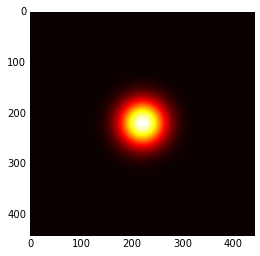

In [213]:
for i in range(size):
    for j in range(size):
        psi[i,j] = np.exp(-(x[i]**2 + y[j]**2)/(L/10)**2)
plt.imshow(abs(psi),cmap=plt.cm.hot);

In [214]:
def laplacian(Z):
    Ztop = Z[0:-2,1:-1]
    Zleft = Z[1:-1,0:-2]
    Zbottom = Z[2:,1:-1]
    Zright = Z[1:-1,2:]
    Zcenter = Z[1:-1,1:-1]
    return (Ztop + Zleft + Zbottom + Zright - 4 * Zcenter) / dx**2

Finished = 0.0%
Finished = 5.0%
Finished = 10.0%
Finished = 15.0%
Finished = 20.0%
Finished = 25.0%
Finished = 30.0%
Finished = 35.0%
Finished = 40.0%
Finished = 45.0%
Finished = 50.0%
Finished = 55.0%
Finished = 60.0%
Finished = 65.0%
Finished = 70.0%
Finished = 75.0%
Finished = 80.0%
Finished = 85.0%
Finished = 90.0%
Finished = 95.0%


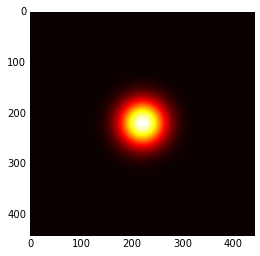

In [215]:
# We simulate the PDE with the finite difference method.
for i in range(n):
    deltapsi = laplacian(psi)
    psic = psi[1:-1,1:-1]
    psi[1:-1,1:-1] = psic + dz * (a * deltapsi + b*psic)
    
    psi[0,:] = psi[1,:]
    psi[-1,:] = psi[-2,:]
    psi[:,0] = psi[:,1]
    psi[:,-1] = psi[:,-2]
    
    if i%(n/20) == 0:
        print 'Finished = {num}%'.format(num=100.0*i/n)
plt.imshow(abs(psi),cmap=plt.cm.hot);

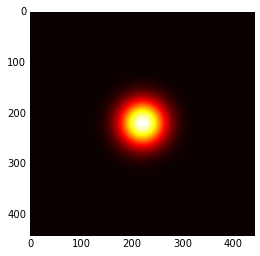

In [203]:
plt.imshow(abs(psi),cmap=plt.cm.hot);